In [1]:
import numpy as np
import matplotlib.pyplot as plt

from simnn import Model
from simnn import Linear, PM_BN
from simnn import ReLU, Softmax, Logistic_Sigmoid
from simnn import CrossEntropy
from simnn.utils import one_hot

from dataset.mnist.mnist import load_mnist_data
from dataset.utils import *

In [2]:
# Extract data
((X_train, Y_train), (X_test, Y_test)) = load_mnist_data('dataset/mnist/')

[X_train, X_test] = d_range([X_train, X_test])  # put data values \in [-1, 1]

# create training / validatin data split
((X_train, Y_train), (X_val, Y_val)) = train_val_split((X_train, Y_train), 1 / 6)

t_train = one_hot(Y_train, m=10)
t_test = one_hot(Y_test, m=10)
t_val = one_hot(Y_val, m=10)

dataset = (X_train, t_train)
val_set = (X_val, t_val)
test_set = (X_test, t_test)

In [3]:
# define model structure
layers = [Linear(out_shape=500, activation=ReLU(), bias=True, init='xavier_uniform'),
          PM_BN(500),
          Linear(out_shape=300, activation=ReLU(), bias=True, init='xavier_uniform'),
          PM_BN(300),
          Linear(out_shape=10, activation=Softmax(), bias=True, init='xavier_uniform')]

# instantiate model
model = Model(layers, dataset, CrossEntropy(), class_task=True)

print(model)

Model, in_shape: 784, out_shape: 10, 
with layers:
Linear Layer, in_shape: 784, out_shape: 500, and has bias: True, 
ReLU
PM_BN
Linear Layer, in_shape: 500, out_shape: 300, and has bias: True, 
ReLU
PM_BN
Linear Layer, in_shape: 300, out_shape: 10, and has bias: True, 
Softmax, shortcut: True, n_stable: True
and cost: CrossEntropyCost


In [4]:
# fit model to datas
model.fit(dataset, num_epochs=64, val_set=val_set, initial_learn=.1,
          aneal_T=30, shuffle=True, b_size=128, verbose=True,
          e_stop=True, e_stop_n=3, early_stop_eps=1e-15)

/Users/vchiley/SIMNN/simnn/model.py:244: UserWarning: Training set not split equally by b_size
  warnings.warn('Training set not split equally by b_size')


Epoch: 28, time: 282.7s, with train cost 0.004152, Train Acc 0.9998, Val Acc 0.9823
Stopping Early!!!!


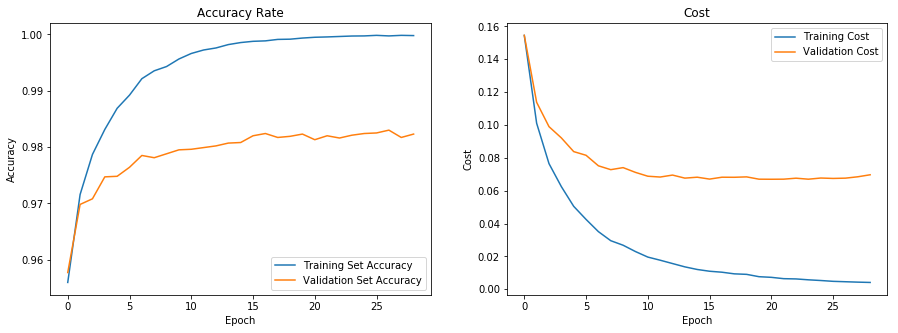

Final Training Accuracy Rate: 0.9998%
Final Validation Accuracy Rate: 0.9823%
Final Training Cost: 0.0041524
Final Validation Cost: 0.069685


In [5]:
# plot Accuracies and Costs for Training and Validation set
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(model.acc_e, label='Training Set Accuracy')
ax1.plot(model.v_acc_e, label='Validation Set Accuracy')
ax1.legend()
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy Rate')
ax2.plot(model.cost_e, label='Training Cost')
ax2.plot(model.v_cost_e, label='Validation Cost')
ax2.legend()
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Cost')
ax2.set_title('Cost')
plt.show()

print("Final Training Accuracy Rate: {:.5}%".format(model.acc_e[-1]))
print("Final Validation Accuracy Rate: {:.5}%".format(model.v_acc_e[-1]))

print("Final Training Cost: {:.5}".format(model.cost_e[-1]))
print("Final Validation Cost: {:.5}".format(model.v_cost_e[-1]))

In [6]:
test_accuracy = model._accuracy_rate(t_test, model.net_fprop(X_test))
print("Final Test Set Accuracy Rate: {:.5}%".format(test_accuracy))

Final Test Set Accuracy Rate: 0.982%


### Conclusion

Even though it looks like the network has overtrained, it still generalizes well to the test set since the test set gets good accuracy rates